## Over Sampled Data using Smote

In [1]:
import pandas as pd
import seaborn as sns
file = pd.read_csv("data.csv")

In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [3]:
file.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking for null values and data shape

In [4]:
print(file.isnull().values.any())
print(file.shape)

False
(6819, 96)


### Ploting bankrupt column

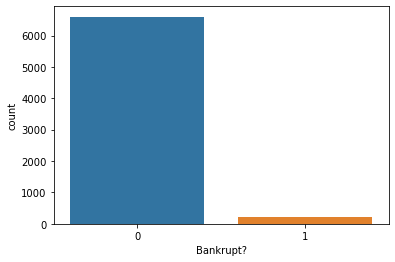

In [5]:
## Data needs to be balanced
sns.countplot(file['Bankrupt?'], label = "Count")

### Data Balancing

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import RandomUnderSampler


In [7]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [9]:
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 4607, 1: 4607})


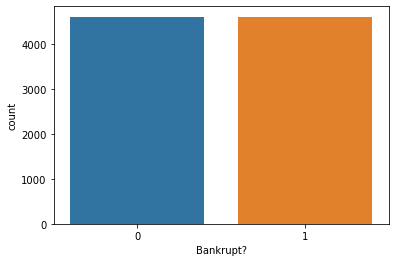

In [10]:
sns.countplot(y_train_SMOTE, label = "Count")

### Feature Selection using filters

#### Chi2 

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train_SMOTE
Y = y_train_SMOTE
best = SelectKBest(score_func=chi2,k=10)
fit = best.fit(X,Y) 

In [12]:
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [13]:
featurescore = pd.concat([dfcol,dfscore], axis = 1)
featurescore.columns = ["feat","Score"]

In [14]:
featurescore

,feat,Score
0,ROA(C) before interest and depreciation befor...,43.307164
1,ROA(A) before interest and % after tax,51.792686
2,ROA(B) before interest and depreciation after...,43.933203
3,Operating Gross Margin,0.250136
4,Realized Sales Gross Margin,0.246172
...,...,...
90,Liability to Equity,2.288597
91,Degree of Financial Leverage (DFL),0.063196
92,Interest Coverage Ratio (Interest expense to ...,0.000818
93,Net Income Flag,0.000000


In [15]:
selectedfeat = featurescore.nlargest(10,"Score")
cols = selectedfeat["feat"]
print(cols)

48           Fixed Assets Turnover Frequency
58                    Cash/Current Liability
11     Research and development expense rate
73                        Cash Turnover Rate
71                 Quick Asset Turnover Rate
28                   Total Asset Growth Rate
75                    Fixed Assets to Assets
29                     Net Value Growth Rate
62               Inventory/Current Liability
45              Accounts Receivable Turnover
Name: feat, dtype: object


### Using KNN Classifier

In [16]:
from ipynb.fs.full.LearningAlg import *

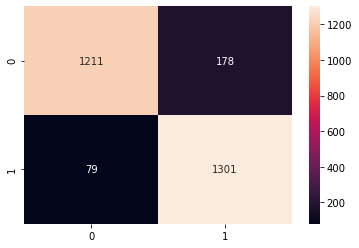

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1389
           1       0.88      0.94      0.91      1380

    accuracy                           0.91      2769
   macro avg       0.91      0.91      0.91      2769
weighted avg       0.91      0.91      0.91      2769



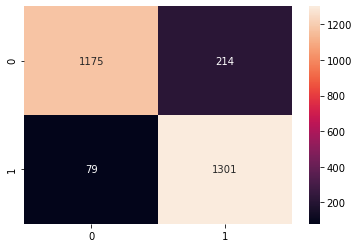

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1389
           1       0.86      0.94      0.90      1380

    accuracy                           0.89      2769
   macro avg       0.90      0.89      0.89      2769
weighted avg       0.90      0.89      0.89      2769



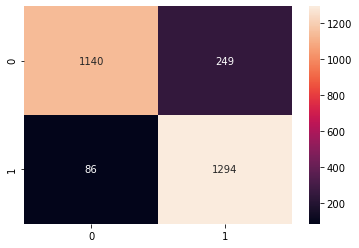

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1389
           1       0.84      0.94      0.89      1380

    accuracy                           0.88      2769
   macro avg       0.88      0.88      0.88      2769
weighted avg       0.88      0.88      0.88      2769



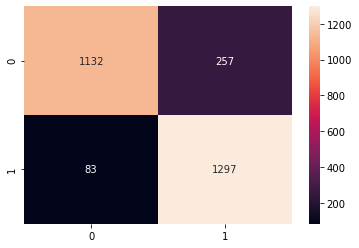

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1389
           1       0.83      0.94      0.88      1380

    accuracy                           0.88      2769
   macro avg       0.88      0.88      0.88      2769
weighted avg       0.88      0.88      0.88      2769



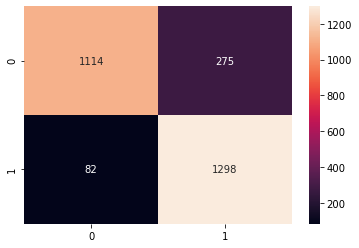

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1389
           1       0.83      0.94      0.88      1380

    accuracy                           0.87      2769
   macro avg       0.88      0.87      0.87      2769
weighted avg       0.88      0.87      0.87      2769



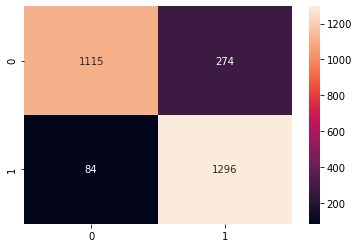

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1389
           1       0.83      0.94      0.88      1380

    accuracy                           0.87      2769
   macro avg       0.88      0.87      0.87      2769
weighted avg       0.88      0.87      0.87      2769



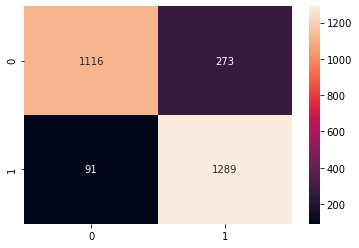

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1389
           1       0.83      0.93      0.88      1380

    accuracy                           0.87      2769
   macro avg       0.87      0.87      0.87      2769
weighted avg       0.88      0.87      0.87      2769



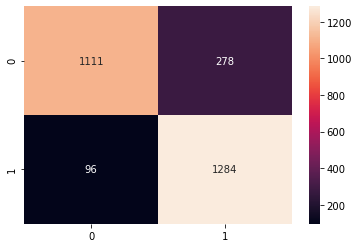

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1389
           1       0.82      0.93      0.87      1380

    accuracy                           0.86      2769
   macro avg       0.87      0.87      0.86      2769
weighted avg       0.87      0.86      0.86      2769



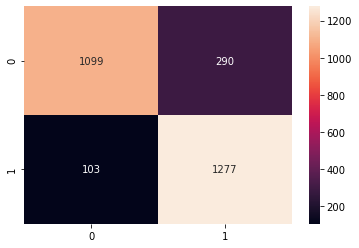

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1389
           1       0.81      0.93      0.87      1380

    accuracy                           0.86      2769
   macro avg       0.86      0.86      0.86      2769
weighted avg       0.86      0.86      0.86      2769



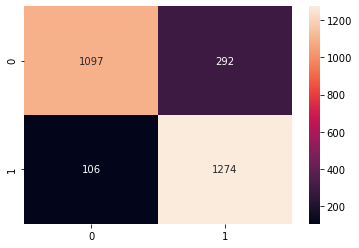

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1389
           1       0.81      0.92      0.86      1380

    accuracy                           0.86      2769
   macro avg       0.86      0.86      0.86      2769
weighted avg       0.86      0.86      0.86      2769



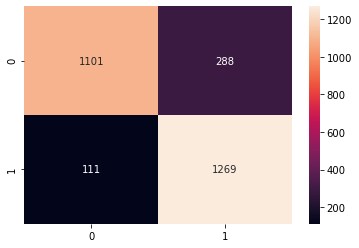

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1389
           1       0.82      0.92      0.86      1380

    accuracy                           0.86      2769
   macro avg       0.86      0.86      0.86      2769
weighted avg       0.86      0.86      0.86      2769



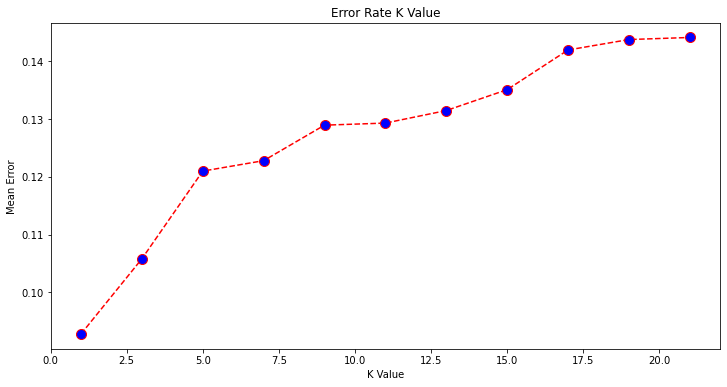

In [17]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

Accuracy: 0.9313831708197905


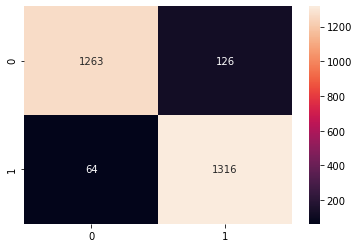

In [18]:
decisionTrees(X_train_SMOTE[cols], y_train_SMOTE)

In [11]:
from ipynb.fs.full.LearningAlg import *

### Feature selection Using Extra Trees Classifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_)

[0.0170769  0.0169136  0.01808486 0.00757732 0.00847581 0.00821314
 0.00902624 0.01003213 0.01221457 0.00982373 0.00934877 0.00981919
 0.00788526 0.01150356 0.00553443 0.01133069 0.0096374  0.01150638
 0.01890954 0.00661195 0.00673755 0.00996852 0.01378533 0.00819205
 0.01005959 0.00705603 0.00687373 0.0093782  0.00908466 0.00974371
 0.01014372 0.00729454 0.0087368  0.00955959 0.01188892 0.01225131
 0.02041419 0.01807757 0.00783434 0.01825729 0.0092709  0.00892656
 0.01643414 0.01004376 0.00876246 0.00713599 0.01103408 0.00791463
 0.01152002 0.00783545 0.00923627 0.01237883 0.01182696 0.01311771
 0.00973861 0.0090515  0.01015646 0.00912845 0.0126326  0.01315947
 0.00744707 0.01008468 0.00825672 0.00943813 0.0120022  0.0119881
 0.00835782 0.01487791 0.00807912 0.01019813 0.00926559 0.0091998
 0.00887881 0.00768455 0.00638888 0.01026448 0.00865688 0.01279241
 0.01209488 0.00729935 0.0070097  0.00856474 0.0076947  0.01002814
 0.00367966 0.02418115 0.01021601 0.01094409 0.00835752 0.018923

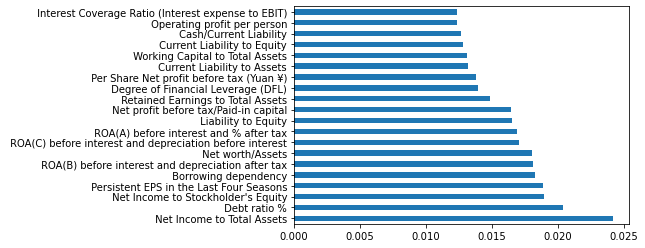

Index([' Net Income to Total Assets', ' Debt ratio %',
       ' Net Income to Stockholder's Equity',
       ' Persistent EPS in the Last Four Seasons', ' Borrowing dependency',
       ' ROA(B) before interest and depreciation after tax',
       ' Net worth/Assets',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax', ' Liability to Equity',
       ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets',
       ' Degree of Financial Leverage (DFL)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Current Liability to Assets', ' Working Capital to Total Assets',
       ' Current Liability to Equity', ' Cash/Current Liability',
       ' Operating profit per person',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')


In [25]:
fimport = pd.Series(model.feature_importances_,index = X.columns)
fimport.nlargest(20).plot(kind = 'barh')
plt.show()
cols = fimport.nlargest(20).index
print(cols)

### Using KNN Classifier

In [23]:
from ipynb.fs.full.LearningAlg import *

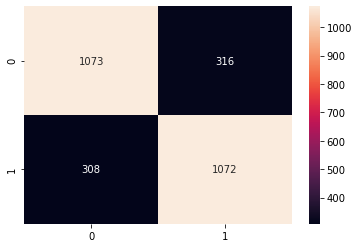

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1389
           1       0.77      0.78      0.77      1380

    accuracy                           0.77      2769
   macro avg       0.77      0.77      0.77      2769
weighted avg       0.77      0.77      0.77      2769



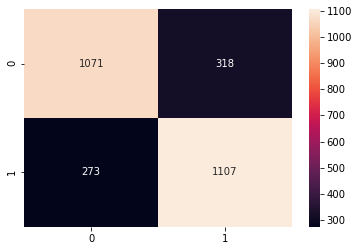

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1389
           1       0.78      0.80      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



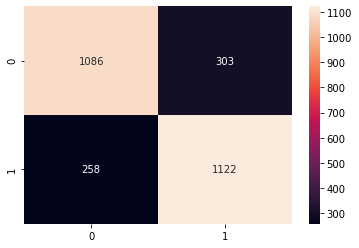

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1389
           1       0.79      0.81      0.80      1380

    accuracy                           0.80      2769
   macro avg       0.80      0.80      0.80      2769
weighted avg       0.80      0.80      0.80      2769



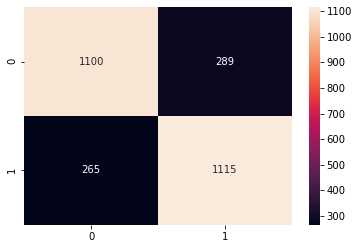

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1389
           1       0.79      0.81      0.80      1380

    accuracy                           0.80      2769
   macro avg       0.80      0.80      0.80      2769
weighted avg       0.80      0.80      0.80      2769



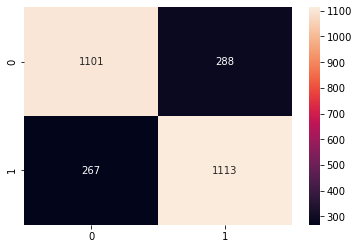

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1389
           1       0.79      0.81      0.80      1380

    accuracy                           0.80      2769
   macro avg       0.80      0.80      0.80      2769
weighted avg       0.80      0.80      0.80      2769



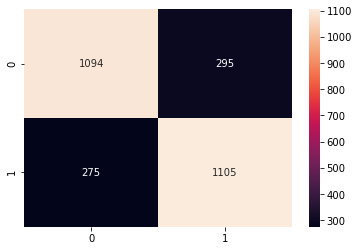

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1389
           1       0.79      0.80      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



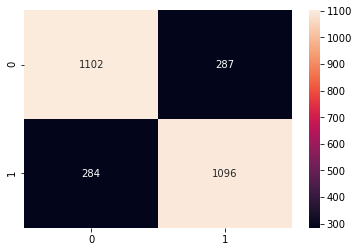

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1389
           1       0.79      0.79      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



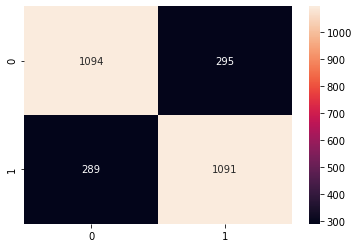

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1389
           1       0.79      0.79      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



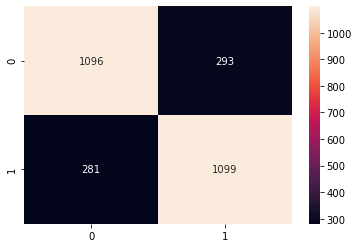

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1389
           1       0.79      0.80      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



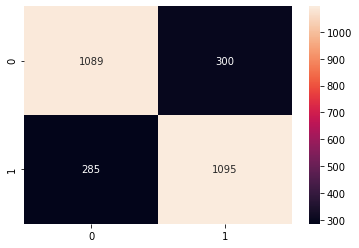

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1389
           1       0.78      0.79      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



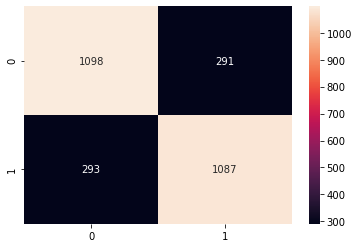

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1389
           1       0.79      0.79      0.79      1380

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



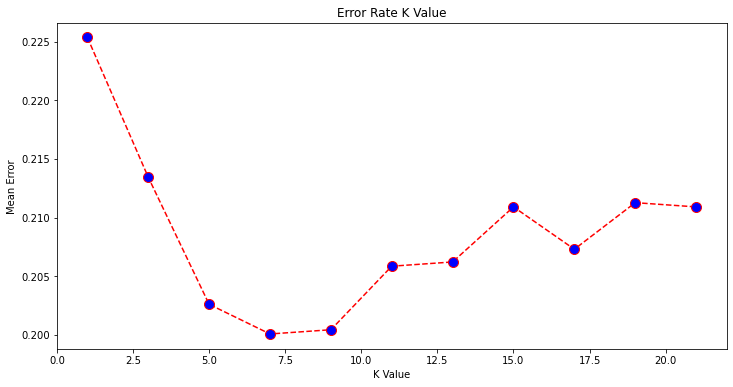

In [24]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

In [25]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.929938605994944


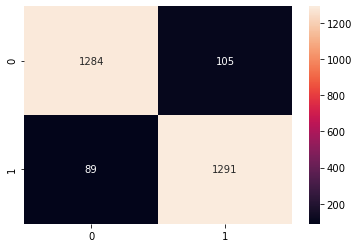

In [26]:
decisionTrees(X_train_SMOTE[cols], y_train_SMOTE)

## SVM

In [15]:
from ipynb.fs.full.LearningAlg import *

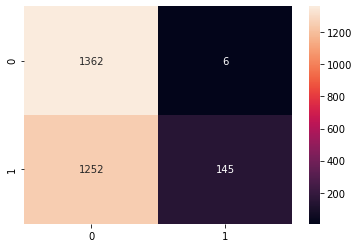

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1368
           1       0.96      0.10      0.19      1397

    accuracy                           0.55      2765
   macro avg       0.74      0.55      0.44      2765
weighted avg       0.74      0.55      0.43      2765



KeyboardInterrupt: 

In [16]:
SVMalg(X_train_SMOTE[cols], y_train_SMOTE)

### Using MLP Classifier

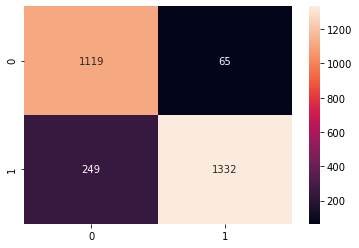

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1368
           1       0.84      0.95      0.89      1397

    accuracy                           0.89      2765
   macro avg       0.89      0.89      0.89      2765
weighted avg       0.89      0.89      0.89      2765



In [15]:
MLPclass(X_train_SMOTE[cols],y_train_SMOTE)

In [17]:
### Using SelectKBEST

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=29)

fit = bestfeatures.fit(X_train_SMOTE,y_train_SMOTE)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(X_train_SMOTE.columns)
featureScore = pd.concat([dfcolumn,dfscore],axis=1)
featureScore.columns = ['Features','Score']

featureScore.sort_values('Score',ascending=False,inplace=True)
featureScore.reset_index(drop=True,inplace=True)

featureScore['Features'][0:29]

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0                                      Net worth/Assets
1                                          Debt ratio %
2               Persistent EPS in the Last Four Seasons
3      ROA(C) before interest and depreciation befor...
4      ROA(B) before interest and depreciation after...
5                 Net profit before tax/Paid-in capital
6              Per Share Net profit before tax (Yuan ¥)
7                ROA(A) before interest and % after tax
8                            Net Income to Total Assets
9                               Net Value Per Share (B)
10                              Net Value Per Share (A)
11                              Net Value Per Share (C)
12                      Working Capital to Total Assets
13                    Retained Earnings to Total Assets
14                          Current Liability to Assets
15                     Operating profit/Paid-in capital
16                  Operating Profit Per Share (Yuan ¥)
17                           Total income/Total 

In [29]:
cols = featureScore['Features'][0:29]
cols = cols.values

In [30]:
from ipynb.fs.full.LearningAlg import *

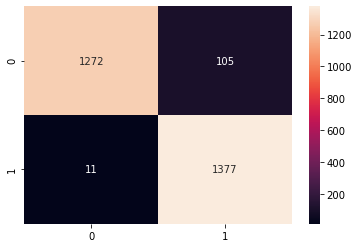

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1377
           1       0.93      0.99      0.96      1388

    accuracy                           0.96      2765
   macro avg       0.96      0.96      0.96      2765
weighted avg       0.96      0.96      0.96      2765



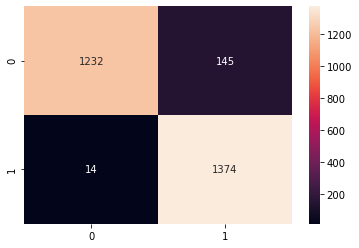

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1377
           1       0.90      0.99      0.95      1388

    accuracy                           0.94      2765
   macro avg       0.95      0.94      0.94      2765
weighted avg       0.95      0.94      0.94      2765



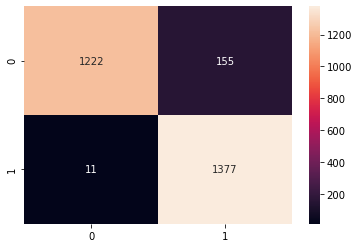

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1377
           1       0.90      0.99      0.94      1388

    accuracy                           0.94      2765
   macro avg       0.94      0.94      0.94      2765
weighted avg       0.94      0.94      0.94      2765



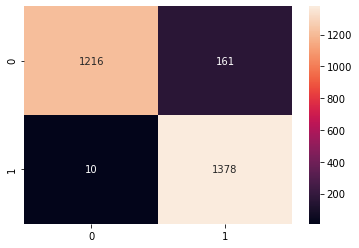

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1377
           1       0.90      0.99      0.94      1388

    accuracy                           0.94      2765
   macro avg       0.94      0.94      0.94      2765
weighted avg       0.94      0.94      0.94      2765



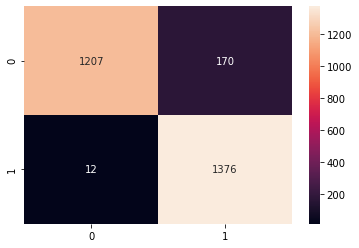

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1377
           1       0.89      0.99      0.94      1388

    accuracy                           0.93      2765
   macro avg       0.94      0.93      0.93      2765
weighted avg       0.94      0.93      0.93      2765



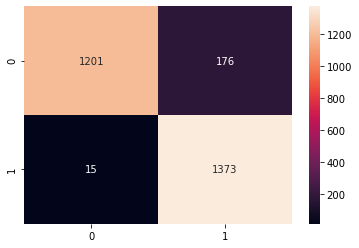

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1377
           1       0.89      0.99      0.93      1388

    accuracy                           0.93      2765
   macro avg       0.94      0.93      0.93      2765
weighted avg       0.94      0.93      0.93      2765



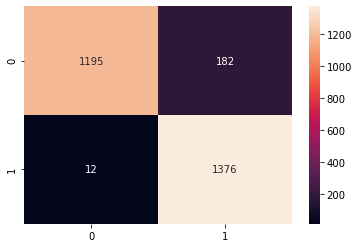

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1377
           1       0.88      0.99      0.93      1388

    accuracy                           0.93      2765
   macro avg       0.94      0.93      0.93      2765
weighted avg       0.94      0.93      0.93      2765



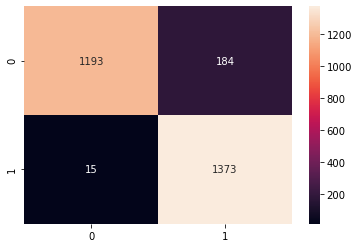

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1377
           1       0.88      0.99      0.93      1388

    accuracy                           0.93      2765
   macro avg       0.93      0.93      0.93      2765
weighted avg       0.93      0.93      0.93      2765



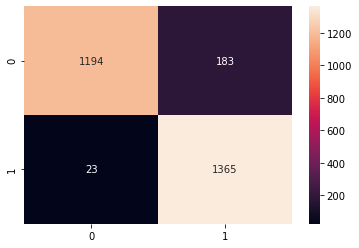

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1377
           1       0.88      0.98      0.93      1388

    accuracy                           0.93      2765
   macro avg       0.93      0.93      0.93      2765
weighted avg       0.93      0.93      0.93      2765



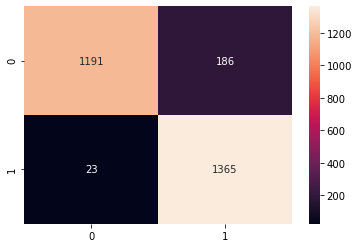

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1377
           1       0.88      0.98      0.93      1388

    accuracy                           0.92      2765
   macro avg       0.93      0.92      0.92      2765
weighted avg       0.93      0.92      0.92      2765



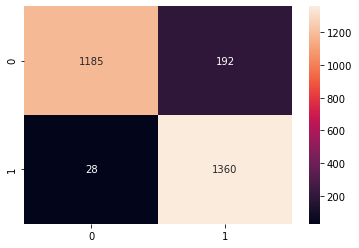

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1377
           1       0.88      0.98      0.93      1388

    accuracy                           0.92      2765
   macro avg       0.93      0.92      0.92      2765
weighted avg       0.93      0.92      0.92      2765



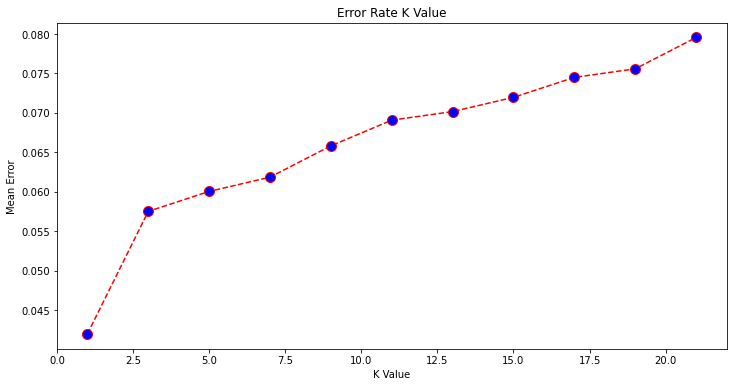

In [31]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

In [32]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.9399638336347197


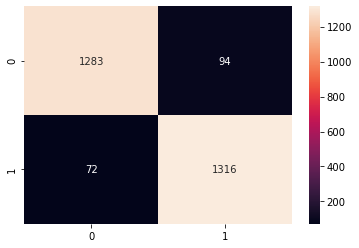

In [33]:
decisionTrees(X_train_SMOTE[cols], y_train_SMOTE)

## SVM

In [34]:
from ipynb.fs.full.LearningAlg import *

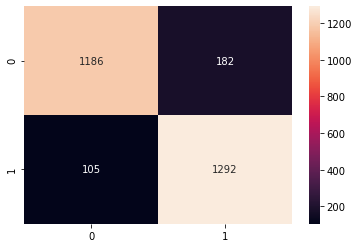

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1368
           1       0.88      0.92      0.90      1397

    accuracy                           0.90      2765
   macro avg       0.90      0.90      0.90      2765
weighted avg       0.90      0.90      0.90      2765



KeyboardInterrupt: 

In [35]:
SVMalg(X_train_SMOTE[cols], y_train_SMOTE)

### Using MLP Classifier

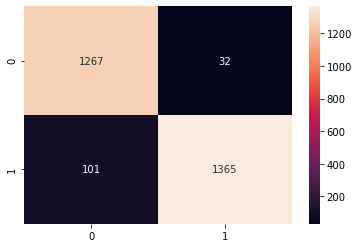

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1368
           1       0.93      0.98      0.95      1397

    accuracy                           0.95      2765
   macro avg       0.95      0.95      0.95      2765
weighted avg       0.95      0.95      0.95      2765



In [36]:
MLPclass(X_train_SMOTE[cols],y_train_SMOTE)